![Illustration of silhouetted heads](mentalhealth.jpg)

### Background Information
Does going to university in a different country affect your mental health? A Japanese international university surveyed its students in 2018 and published a study the following year that was approved by several ethical and regulatory boards.

The study found that international students have a higher risk of mental health difficulties than the general population, and that social connectedness (belonging to a social group) and acculturative stress (stress associated with joining a new culture) are predictive of depression.


Explore the `students` data to find out if you would come to a similar conclusion for international students and see if the length of stay is a contributing factor.

Here is a data description of the columns you may find helpful.

| Field Name    | Description                                      |
| ------------- | ------------------------------------------------ |
| `inter_dom`     | Types of students (international or domestic)   |
| `japanese_cate` | Japanese language proficiency                    |
| `english_cate`  | English language proficiency                     |
| `academic`      | Current academic level (undergraduate or graduate) |
| `age`           | Current age of student                           |
| `stay`          | Current length of stay in years                  |
| `todep`         | Total score of depression (PHQ-9 test)           |
| `tosc`          | Total score of social connectedness (SCS test)   |
| `toas`          | Total score of acculturative stress (ASISS test) |

## Create students.db

In [18]:
# !pip install pandas sqlite3 ipython-sql jupyter
# !pip install sqlalchemy

In [19]:
import sqlite3
from sqlalchemy import create_engine

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Print SQLite version to ensure it's working
# print(f"SQLite version: {sqlite3.sqlite_version}")

In [21]:
# Load CSV into DataFrame
csv_file = "students.csv"
df = pd.read_csv(csv_file)

# Create SQLite Database
conn = sqlite3.connect("students.db")
df.to_sql("students", conn, if_exists="replace", index=False)
conn.close()
print("Data loaded into SQLite database successfully.")

Data loaded into SQLite database successfully.


## Data Preprocessing

In [22]:
# Connect to SQLite database
engine = create_engine("sqlite:///students.db")

# Load the data from the database for analysis
query = """
SELECT inter_dom, japanese_cate, english_cate, academic, age, stay, todep, tosc, toas
FROM students
WHERE inter_dom = 'Inter';
"""

# query = """
# SELECT *
# FROM students
# WHERE inter_dom = 'Inter';
# """

data = pd.read_sql_query(query, engine)
data

,inter_dom,japanese_cate,english_cate,academic,age,stay,todep,tosc,toas
0,Inter,Average,High,Grad,24.0,5.0,0.0,34.0,91.0
1,Inter,High,High,Grad,28.0,1.0,2.0,48.0,39.0
2,Inter,High,High,Grad,25.0,6.0,2.0,41.0,51.0
3,Inter,Low,Average,Grad,29.0,1.0,3.0,37.0,75.0
4,Inter,Low,Average,Grad,28.0,1.0,3.0,37.0,82.0
...,...,...,...,...,...,...,...,...,...
196,Inter,High,High,Under,21.0,3.0,6.0,37.0,82.0
197,Inter,Low,High,Under,20.0,1.0,7.0,16.0,145.0
198,Inter,Low,High,Under,21.0,3.0,16.0,25.0,110.0
199,Inter,Low,High,Under,18.0,1.0,8.0,38.0,68.0


In [23]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 inter_dom        0
japanese_cate    0
english_cate     0
academic         0
age              0
stay             0
todep            0
tosc             0
toas             0
dtype: int64


* Transformed features like japanese_cate, english_cate, and academic into machine-readable formats to enable statistical and machine learning analyses.

In [24]:
# # Convert categorical columns to numerical if necessary
# categorical_columns = ['japanese_cate', 'english_cate', 'academic']
# data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
# data.head(15)

## Exploratory Data Analysis

* Used Seaborn heatmaps to visualize correlations and pairplots to explore variable distributions and relationships.
    * Heatmaps and pairplots reveal correlations and trends among variables, making the data actionable for university administrators.

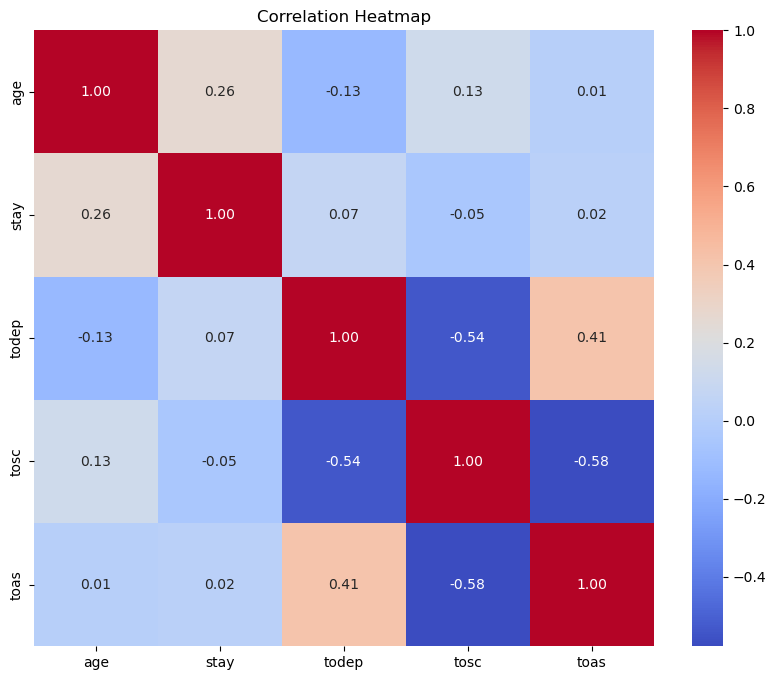

In [25]:
# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

1) Correlation Heatmap  

The heatmap shows the relationships between key variables:  

**Depression (todep) vs. Social Connectedness (tosc):**  
•	Correlation: -0.54  
•	A strong negative relationship, indicating that students with higher social connectedness tend to have lower depression levels.  

**Depression (todep) vs. Acculturative Stress (toas):**  
•	Correlation: 0.41  
•	A moderate positive relationship, suggesting that higher acculturative stress is associated with higher depression scores.  

**Depression (todep) vs. Length of Stay (stay):**  
•	Correlation: 0.07  
•	No significant relationship, suggesting that length of stay may not directly impact depression.  

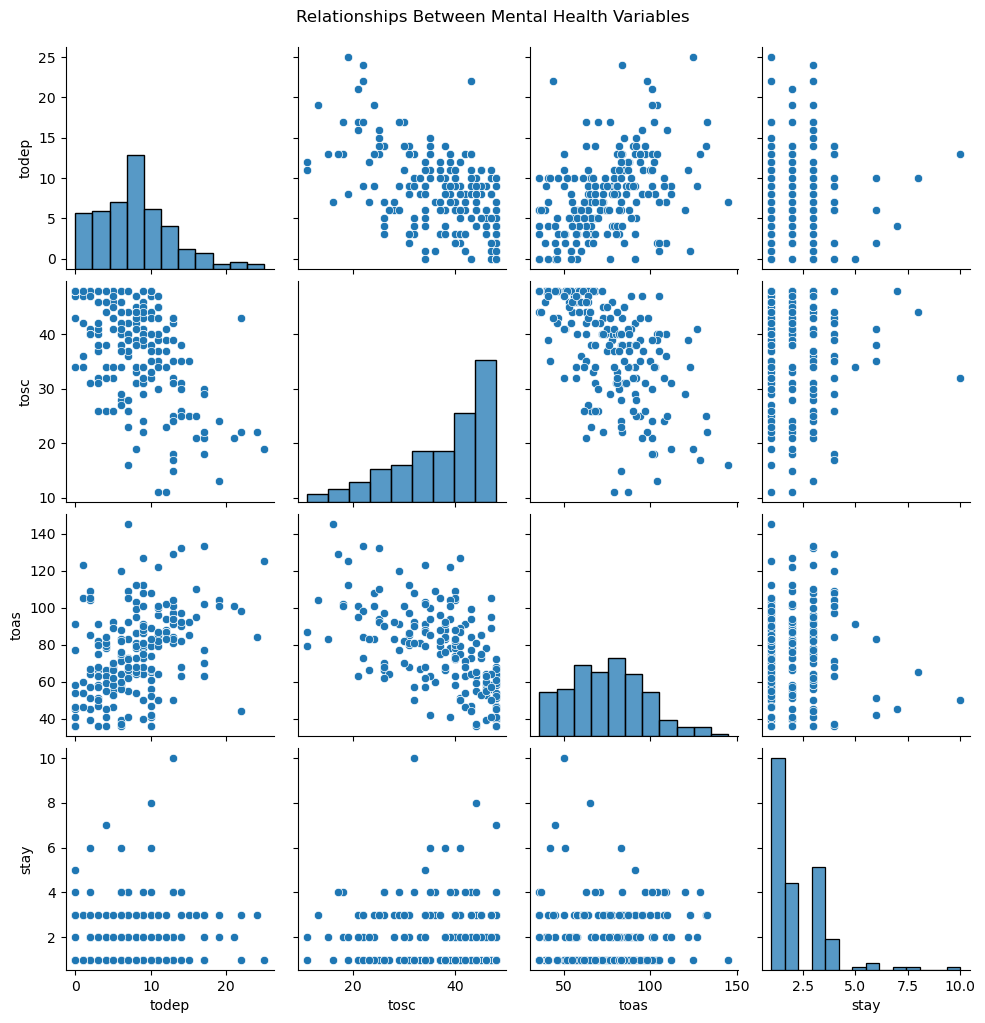

In [26]:
# Pairplot to explore relationships between key variables
sns.pairplot(data[['todep', 'tosc', 'toas', 'stay']])
plt.suptitle("Relationships Between Mental Health Variables", y=1.02)
plt.show()

2. Pairplot Analysis

The pairplot provides a visual representation of the relationships:  
	•	Clear **negative trend** between `todep` (depression) and `tosc` (social connectedness).  
	•	A **positive trend** between `todep` and `toas` (acculturative stress), with some variability.  
	•	Distribution of `stay` suggests that most students are in their early years of study, with fewer staying longer.  

## Statistical Analysis

### Demographic Insights

Academic Level:  
	•	Higher depression scores in undergraduates may indicate the need for peer mentorship programs.  

Language Proficiency:  
	•	Low Japanese/English proficiency might correlate with higher stress and depression, highlighting the importance of language support programs.
	
Age:  
	•	Older students might have lower stress or depression due to better coping mechanisms.

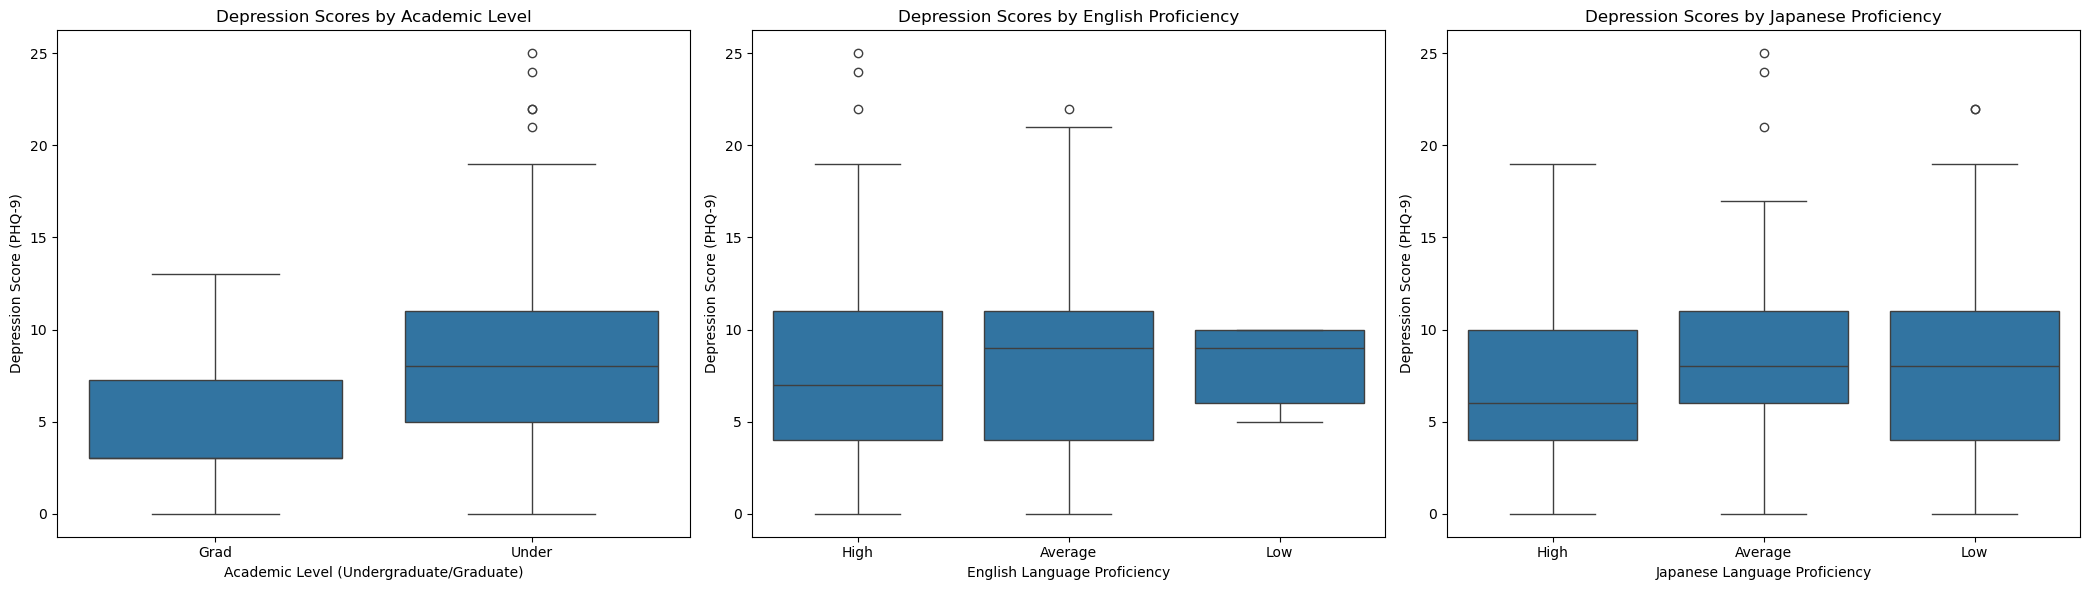

In [27]:
# Analyze academic level and depression
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

sns.boxplot(x='academic', y='todep', data=data, ax=axes[0])
axes[0].set_title("Depression Scores by Academic Level")
axes[0].set_xlabel("Academic Level (Undergraduate/Graduate)")
axes[0].set_ylabel("Depression Score (PHQ-9)")

# Analyze English language proficiency and depression
sns.boxplot(x='english_cate', y='todep', data=data, ax=axes[1])
axes[1].set_title("Depression Scores by English Proficiency")
axes[1].set_xlabel("English Language Proficiency")
axes[1].set_ylabel("Depression Score (PHQ-9)")

# Analyze Japanese language proficiency and depression
japanese_order = ['High', 'Average', 'Low']  # Specify the correct order
sns.boxplot(x='japanese_cate', y='todep', data=data, ax=axes[2], order=japanese_order)
axes[2].set_title("Depression Scores by Japanese Proficiency")
axes[2].set_xlabel("Japanese Language Proficiency")
axes[2].set_ylabel("Depression Score (PHQ-9)")

plt.tight_layout()
plt.show()


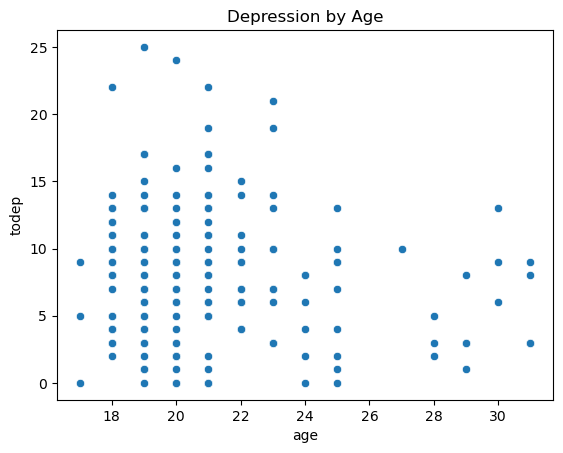

Correlation between Age and Depression: -0.13, p-value: 0.0594


In [28]:
# Analyze age and depression
from scipy.stats import pearsonr

sns.scatterplot(data=data, x='age', y='todep')
plt.title('Depression by Age')
plt.show()

corr_age_todep, pval_age_todep = pearsonr(data['age'], data['todep'])
print(f"Correlation between Age and Depression: {corr_age_todep:.2f}, p-value: {pval_age_todep:.4f}")

* Applied Pearson correlation and p-value testing to determine the strength and significance of relationships between variables.

In [29]:
# Correlation between depression and social connectedness
corr_todep_tosc, pval_todep_tosc = pearsonr(data['todep'], data['tosc'])
# Correlation between depression and acculturative stress
corr_todep_toas, pval_todep_toas = pearsonr(data['todep'], data['toas'])
# Correlation between depression and length of stay
corr_todep_stay, pval_todep_stay = pearsonr(data['todep'], data['stay'])

# Print results
print(f"Depression vs Social Connectedness: Correlation = {corr_todep_tosc:.2f}, p-value = {pval_todep_tosc:.4f}")
print(f"Depression vs Acculturative Stress: Correlation = {corr_todep_toas:.2f}, p-value = {pval_todep_toas:.4f}")
print(f"Depression vs Length of Stay: Correlation = {corr_todep_stay:.2f}, p-value = {pval_todep_stay:.4f}")

Depression vs Social Connectedness: Correlation = -0.54, p-value = 0.0000
Depression vs Acculturative Stress: Correlation = 0.41, p-value = 0.0000
Depression vs Length of Stay: Correlation = 0.07, p-value = 0.3033


3. Statistical Hypothesis Testing

**Depression vs. Social Connectedness:**  
•	Correlation: `-0.54`, p-value: `0.0000`  
•	The p-value is essentially zero, which is much **smaller** than the typical significance threshold of **0.05**.  
•	This means the **negative relationship** between depression (todep) and social connectedness (tosc) is **highly significant**. We can confidently say that higher social connectedness reduces depression.

**Depression vs. Acculturative Stress:**  
•	Correlation: `0.41`, p-value: `0.0000`  
•	The p-value is again much **smaller** than **0.05**, indicating that the **positive relationship** between depression (todep) and acculturative stress (toas) is **statistically significant**.  
•	This confirms that higher acculturative stress is strongly associated with higher depression scores.

**Depression vs. Length of Stay:**  
•	Correlation: `0.07`, p-value: `0.3033`  
•	The p-value is **greater** than **0.05**, meaning the relationship is **NOT statistically significant**.  
•	The weak correlation **(0.07)** suggests there is **no meaningful relationship** between length of stay (`stay`) and depression (`todep`).  
•	This indicates that length of stay alone does not directly influence depression, though it might have an indirect effect through other factors (e.g., building social connectedness over time).


### Analysis of Interaction Effects

This regression analysis explores whether length of stay (stay) moderates the relationships between:  
•	Depression (todep) and social connectedness (tosc).  
•	Depression (todep) and acculturative stress (toas).  

In [30]:
import statsmodels.formula.api as ols
# import statsmodels.api as sm

# Add interaction terms to explore length of stay's moderating effect
formula = "todep ~ tosc * stay + toas * stay"
interaction_model = ols.ols(formula, data=data).fit()

# Summarize the results
print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  todep   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     18.02
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           1.11e-14
Time:                        02:47:40   Log-Likelihood:                -566.14
No. Observations:                 201   AIC:                             1144.
Df Residuals:                     195   BIC:                             1164.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.4347      4.115      2.293      0.0

1. Model Fit  

R-Squared: 0.316  
	•	The model explains 31.6% of the variance in depression scores (todep).  
	•	This is a moderate fit, indicating that the included predictors and interaction terms capture some, of the variance in depression.  
> If adjusted R^2 decreases when adding a variable, that variable likely does not improve the model. 

F-Statistic: 18.02  
	•	The F-statistic is relatively large, suggesting that the predictors collectively explain a significant portion of the variance in depression scores (todep).  

P-Value: 1.11e-14  
	•	The associated p-value is extremely small (< 0.05), confirming that the model as a whole is statistically significant.

> The predictors in your model (tosc, toas, stay, and their interactions) collectively have a significant relationship with depression scores.

2. Key Coefficients

**Main Effects:**  
`tosc` (Social Connectedness):  
	•	Coefficient: -0.1890, p-value: 0.010  
	•	Significant negative effect, confirming that higher social connectedness reduces depression.  
	•	A unit increase in tosc decreases depression by 0.19 points, holding other variables constant.

`toas` (Acculturative Stress):  
	•	Coefficient: 0.0745, p-value: 0.010  
	•	Significant positive effect, indicating that higher acculturative stress increases depression.  
	•	A unit increase in toas increases depression by 0.0745 points, holding other variables constant.  
> The coefficient value (0.0745) is statistically significant because the relationship between toas and todep is consistent and unlikely to occur by chance (p = 0.01 < 0.05).

`stay` (Length of Stay):  
	•	Coefficient: 2.3036, p-value: 0.151  
	•	Not statistically significant, meaning length of stay alone does not directly affect depression.  



**Interaction Effects:**  
`tosc:stay` (Social Connectedness × Length of Stay):  
	•	Coefficient: -0.0241, p-value: 0.427  
	•	Not statistically significant, suggesting that length of stay does not significantly alter the impact of social connectedness on depression.  

`toas:stay` (Acculturative Stress × Length of Stay):  
	•	Coefficient: -0.0182, p-value: 0.087  
	•	Marginally significant (p < 0.1), indicating that the effect of acculturative stress on depression weakens slightly as length of stay increases.  

3. Interpretation

Social Connectedness:  
	•	Strong and significant negative relationship with depression, regardless of length of stay.  
	•	Length of stay does not meaningfully change the effect of social connectedness.  

Acculturative Stress:  
	•	Positive relationship with depression but the interaction term `toas:stay` (-0.0182) suggests that the longer students stay, the weaker the relationship between acculturative stress and depression becomes.  
	•	This could mean that students who stay longer may adapt better to the new culture, reducing the psychological burden of acculturative stress over time.

Length of Stay:  
	•	No direct relationship with depression, but it marginally moderates the effect of acculturative stress.  

**Key Takeaways:**

•	Actionable Insight: Focus interventions on reducing acculturative stress, particularly for students in their early years of study, where its impact on depression is strongest.  
•	Social Connectedness remains a critical factor in reducing depression, and its importance does not diminish with length of stay.

## Machine Learning

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report

# Features and target for regression (predict depression scores)
X_reg = data[['tosc', 'toas', 'stay']]
y_reg = data['todep']

# Features and target for classification (high-risk depression threshold)
y_class = (data['todep'] > 10).astype(int)  # Example threshold for high depression

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_reg, y_class, test_size=0.3, random_state=42)

* Statistical analysis provides insights into relationships but cannot predict outcomes. Machine learning models predict:  
    •	**Regression**: Depression scores based on predictors like social connectedness, acculturative stress, and length of stay.  
    •	**Random Forest Regression** to predict continuous depression scores (e.g., for university-wide monitoring).  

    •	**Classification**: High-risk students for targeted interventions.  
    •	**Random Forest Classifier** to classify students into risk categories based on depression scores.

In [32]:
# Regression model
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train_reg, y_train_reg)
y_pred_reg = regressor.predict(X_test_reg)

print("Regression Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y_test_reg, y_pred_reg):.2f}")

Regression Metrics:
Mean Squared Error: 17.59


**Regression Metrics**  
Mean Squared Error (MSE): `17.59`  
•	Definition: MSE is the average of the squared differences between actual and predicted values. It penalizes larger errors more than smaller ones.  
•	Interpretation:  An MSE of 17.59 indicates moderate prediction error, meaning the model can predict depression scores with reasonable accuracy but still has room for improvement. Lower MSE values are better; thus, improving feature engineering or trying more complex models (e.g., gradient boosting) could reduce error further.  
  

In [33]:
# Classification model
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_class, y_train_class)
y_pred_class = classifier.predict(X_test_class)

print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_class))


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        41
           1       0.69      0.45      0.55        20

    accuracy                           0.75        61
   macro avg       0.73      0.68      0.69        61
weighted avg       0.75      0.75      0.74        61



**Classification Report**  
The report evaluates the model’s performance in classifying students as “high-risk depression” (Class 1) or “not at risk” (Class 0) using key metrics:  
1.	Accuracy: 75%  
•	Definition: The proportion of correctly classified instances out of all predictions.  
•	Interpretation: The model correctly predicted whether students were high-risk or not 75% of the time, which is a reasonably good result.  
2.	Precision (Class 0 = Not at Risk): 0.77  
•	Definition: The percentage of students predicted as “not at risk” that were actually not at risk.  
•	Interpretation: Of all students classified as “not at risk,” 77% were correct. High precision for Class 0 means the model avoids falsely labeling students as “not at risk” when they are actually at risk.  
3.	Recall (Class 1 = High Risk): 0.45  
•	Definition: The percentage of actual high-risk students that the model correctly identified.  
•	Interpretation: The model identified 45% of the actual high-risk students. The low recall for Class 1 suggests the model struggles to identify all high-risk students, likely due to class imbalance (fewer high-risk samples in the dataset).  
4.	F1-Score:  
•	Class 0 (Not at Risk): 0.83  
•	Combines precision and recall for Class 0, indicating the model is good at identifying non-risk students.  
•	Class 1 (High Risk): 0.55  
•	Combines precision and recall for high-risk students, showing the model is less effective at identifying them accurately.  
5.	Macro Avg:  
•	Average performance across both classes, treating them equally regardless of class size.  
•	Precision: 0.73, Recall: 0.68, F1-Score: 0.69.  
6.	Weighted Avg:  
•	Average performance weighted by the number of instances in each class.  
•	Precision: 0.75, Recall: 0.75, F1-Score: 0.74.  
  


**Key Takeaways**  
Strengths:  
•	The model is good at identifying students who are “not at risk” (Class 0) with high precision and recall.  
•	The overall accuracy of 75% shows the model has a solid baseline performance.  
Weaknesses:  
•	The model struggles with recall for high-risk students (Class 1), identifying less than half of them. This could be due to:  
•	Class Imbalance: There are significantly fewer high-risk students compared to not-at-risk students.  
•	Feature Limitations: The features used might not capture enough signal to distinguish high-risk students effectively.  


Correlation: -0.13  
•	A weak negative correlation between age and depression scores.  
•	Indicates that as age increases, depression scores tend to slightly decrease.  

P-Value: 0.0594  
•	This p-value is greater than 0.05, suggesting the relationship is not statistically significant.  
•	We cannot confidently conclude that age has a meaningful impact on depression based on this analysis.  